In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle datasets download -d dheerajperumandla/drowsiness-dataset

 99% 160M/161M [00:08<00:00, 24.1MB/s]
100% 161M/161M [00:08<00:00, 20.5MB/s]


In [17]:
!unzip /content/drowsiness-dataset.zip -d /content

Archive:  /content/drowsiness-dataset.zip
  inflating: /content/train/Closed/_0.jpg  
  inflating: /content/train/Closed/_1.jpg  
  inflating: /content/train/Closed/_10.jpg  
  inflating: /content/train/Closed/_100.jpg  
  inflating: /content/train/Closed/_101.jpg  
  inflating: /content/train/Closed/_102.jpg  
  inflating: /content/train/Closed/_103.jpg  
  inflating: /content/train/Closed/_104.jpg  
  inflating: /content/train/Closed/_105.jpg  
  inflating: /content/train/Closed/_106.jpg  
  inflating: /content/train/Closed/_107.jpg  
  inflating: /content/train/Closed/_108.jpg  
  inflating: /content/train/Closed/_109.jpg  
  inflating: /content/train/Closed/_11.jpg  
  inflating: /content/train/Closed/_110.jpg  
  inflating: /content/train/Closed/_111.jpg  
  inflating: /content/train/Closed/_112.jpg  
  inflating: /content/train/Closed/_113.jpg  
  inflating: /content/train/Closed/_114.jpg  
  inflating: /content/train/Closed/_115.jpg  
  inflating: /content/train/Closed/_116.jpg 

In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/107.7 GB disk)


In [5]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')                     

100%|██████████| 4.87M/4.87M [00:00<00:00, 12.4MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 37.4MB/s]

ERROR: HTTP Error 403: Server failed to authenticate the request. Make sure the value of Authorization header is formed correctly including the signature.
Re-attempting https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m-cls.pt to weights/yolov5m-cls.pt...

100%|██████████| 50.9M/50.9M [00:01<00:00, 33.1MB/s]

100%|██████████| 92.0M/92.0M [00:02<00:00, 33.2MB/s]



In [44]:
#delete existing folder
import shutil
import os

# Define the path of the folder to delete
folder_path = '/content/eyedetection'
# Use shutil.rmtree() to delete the folder and all its contents
shutil.rmtree(folder_path)

In [10]:
#resize images in new directory
import os
import cv2

source_dir = '/content/train/Closed'
target_dir = '/content/resized_eyedata/closed'

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Loop through each folder in the source directory
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)
    if os.path.isdir(folder_path):
        # Create the corresponding folder in the target directory
        target_folder_path = os.path.join(target_dir, folder_name)
        if not os.path.exists(target_folder_path):
            os.makedirs(target_folder_path)
        
        # Loop through each image in the folder and resize it
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            target_image_path = os.path.join(target_folder_path, image_name)
            
            if not os.path.isfile(target_image_path):
                img = cv2.imread(image_path)
                if img is not None:
                    img = cv2.resize(img, (145, 145))
                    cv2.imwrite(target_image_path, img)
                else:
                    print(f"Invalid image: {image_path}")
            else:
                print(f"Skipping image: {image_path}")


In [35]:
#split data into train and val in new directory
import os
import shutil
import random

source_dir = '/content/eyedetection/train'

if not os.path.exists('/content/new_split'):
    os.makedirs('/content/new_split')

train_dir = '/content/new_split/train'
val_dir = '/content/new_split/val'
train_ratio = 0.8  # 80% of the data will be used for training

# Create the train and validation directories
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Loop through each folder in the source directory
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)
    if os.path.isdir(folder_path):
        # Create the corresponding folders in the train and validation directories
        train_folder_path = os.path.join(train_dir, folder_name)
        val_folder_path = os.path.join(val_dir, folder_name)
        if not os.path.exists(train_folder_path):
            os.makedirs(train_folder_path)
        if not os.path.exists(val_folder_path):
            os.makedirs(val_folder_path)

        # Get a list of all the images in the folder
        images = os.listdir(folder_path)
        num_images = len(images)

        # Shuffle the images randomly
        random.shuffle(images)

        # Split the images into train and validation sets
        num_train = int(num_images * train_ratio)
        train_images = images[:num_train]
        val_images = images[num_train:]

        # Copy the images to the corresponding train and validation folders
        for image_name in train_images:
            image_path = os.path.join(folder_path, image_name)
            target_path = os.path.join(train_folder_path, image_name)
            shutil.copy(image_path, target_path)
        for image_name in val_images:
            image_path = os.path.join(folder_path, image_name)
            target_path = os.path.join(val_folder_path, image_name)
            shutil.copy(image_path, target_path)


In [22]:
!python /content/yolov5/classify/train.py --model yolov5n-cls.pt --data /content/eyedata --epochs 50 --img 145 --pretrained /content/yolo.pt

classify/train: model=yolov5n-cls.pt, data=/content/eyedata, epochs=50, batch_size=64, imgsz=145, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=/content/yolo.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CPU

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=145, width=145, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
100% 4.87M/4.87M 

In [24]:
!zip -r /content/eye.zip /content/yolov5/runs/train-cls/exp
from google.colab import files
files.download('/content/eye.zip')

  adding: content/yolov5/runs/train-cls/exp/ (stored 0%)
  adding: content/yolov5/runs/train-cls/exp/train_images.jpg (deflated 9%)
  adding: content/yolov5/runs/train-cls/exp/results.csv (deflated 87%)
  adding: content/yolov5/runs/train-cls/exp/events.out.tfevents.1684670969.7042249bdf2d.4374.0 (deflated 6%)
  adding: content/yolov5/runs/train-cls/exp/test_images.jpg (deflated 7%)
  adding: content/yolov5/runs/train-cls/exp/opt.yaml (deflated 35%)
  adding: content/yolov5/runs/train-cls/exp/weights/ (stored 0%)
  adding: content/yolov5/runs/train-cls/exp/weights/best.pt (deflated 10%)
  adding: content/yolov5/runs/train-cls/exp/weights/last.pt (deflated 10%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
!python /content/yolov5/classify/train.py --model yolov5n-cls.pt --data /content/yawndata --epochs 50 --pretrained /content/yolo.pt

classify/train: model=yolov5n-cls.pt, data=/content/yawndata, epochs=50, batch_size=64, imgsz=224, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=/content/yolo.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CPU

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
Model summary: 1

In [25]:
!zip -r /content/yawn.zip /content/yolov5/runs/train-cls/exp2
from google.colab import files
files.download('/content/yawn.zip')

  adding: content/yolov5/runs/train-cls/exp2/ (stored 0%)
  adding: content/yolov5/runs/train-cls/exp2/train_images.jpg (deflated 5%)
  adding: content/yolov5/runs/train-cls/exp2/results.csv (deflated 86%)
  adding: content/yolov5/runs/train-cls/exp2/test_images.jpg (deflated 5%)
  adding: content/yolov5/runs/train-cls/exp2/events.out.tfevents.1684672345.7042249bdf2d.9926.0 (deflated 5%)
  adding: content/yolov5/runs/train-cls/exp2/opt.yaml (deflated 35%)
  adding: content/yolov5/runs/train-cls/exp2/weights/ (stored 0%)
  adding: content/yolov5/runs/train-cls/exp2/weights/best.pt (deflated 10%)
  adding: content/yolov5/runs/train-cls/exp2/weights/last.pt (deflated 10%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
!unzip /content/drive/MyDrive/data/detection.zip -d /content/eyedetection

Archive:  /content/drive/MyDrive/data/detection.zip
   creating: /content/eyedetection/detection/
  inflating: /content/eyedetection/detection/.DS_Store  
  inflating: /content/eyedetection/__MACOSX/detection/._.DS_Store  
   creating: /content/eyedetection/detection/images/
   creating: /content/eyedetection/detection/labels/
   creating: /content/eyedetection/detection/images/train/
  inflating: /content/eyedetection/__MACOSX/detection/images/._train  
   creating: /content/eyedetection/detection/images/val/
  inflating: /content/eyedetection/__MACOSX/detection/images/._val  
   creating: /content/eyedetection/detection/labels/train/
  inflating: /content/eyedetection/__MACOSX/detection/labels/._train  
   creating: /content/eyedetection/detection/labels/val/
  inflating: /content/eyedetection/__MACOSX/detection/labels/._val  
  inflating: /content/eyedetection/detection/images/train/open_-52-_jpg.rf.e1e9a4f219f077978f7453877992b2e0.jpg  
  inflating: /content/eyedetection/__MACOSX/d

In [51]:
!python /content/yolov5/train.py --batch 16 --epochs 10 --data /content/eye_detect.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/eye_detect.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0

In [52]:
!zip -r /content/eyeDetect.zip /content/yolov5/runs/train/exp8
from google.colab import files
files.download('/content/eyeDetect.zip')

  adding: content/yolov5/runs/train/exp8/ (stored 0%)
  adding: content/yolov5/runs/train/exp8/train_batch0.jpg (deflated 4%)
  adding: content/yolov5/runs/train/exp8/R_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp8/P_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp8/results.csv (deflated 80%)
  adding: content/yolov5/runs/train/exp8/val_batch0_pred.jpg (deflated 13%)
  adding: content/yolov5/runs/train/exp8/val_batch2_pred.jpg (deflated 10%)
  adding: content/yolov5/runs/train/exp8/val_batch1_pred.jpg (deflated 12%)
  adding: content/yolov5/runs/train/exp8/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp8/train_batch1.jpg (deflated 4%)
  adding: content/yolov5/runs/train/exp8/results.png (deflated 10%)
  adding: content/yolov5/runs/train/exp8/labels_correlogram.jpg (deflated 43%)
  adding: content/yolov5/runs/train/exp8/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp8/labels.jpg (deflated 31%)
  adding: content/yolov5/r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
!python /content/yolov5/classify/predict.py --weights /content/yolov5/runs/train-cls/exp2/weights/best.pt --source /content/eye1yawn11.jpg --save-txt

classify/predict: weights=['/content/yolov5/runs/train-cls/exp2/weights/best.pt'], source=/content/eye1yawn11.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=True, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 117 layers, 1211026 parameters, 0 gradients, 2.9 GFLOPs
0.51 yawn
0.49 no_yawn
image 1/1 /content/eye1yawn11.jpg: 224x224 yawn 0.51, no_yawn 0.49, 14.5ms
Speed: 0.1ms pre-process, 14.5ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp3
1 labels saved to runs/predict-cls/exp3/labels


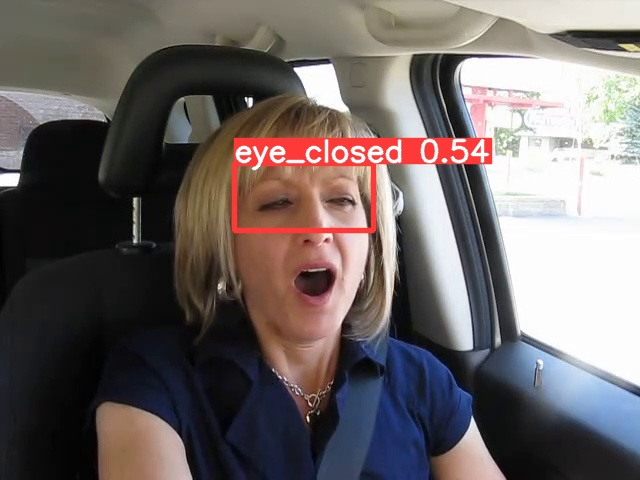

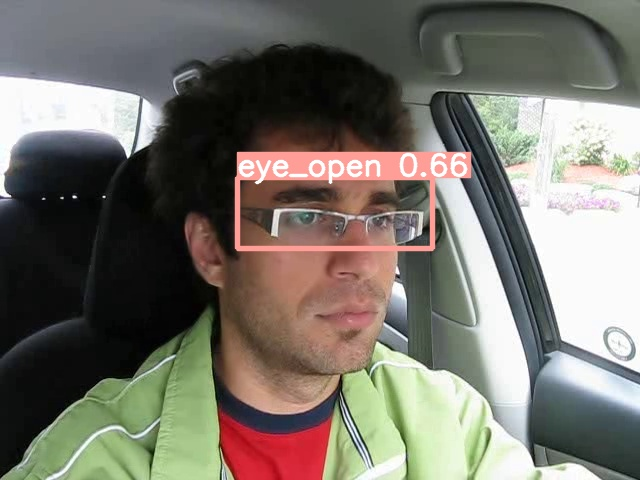



0.95 no_yawn
0.05 yawn


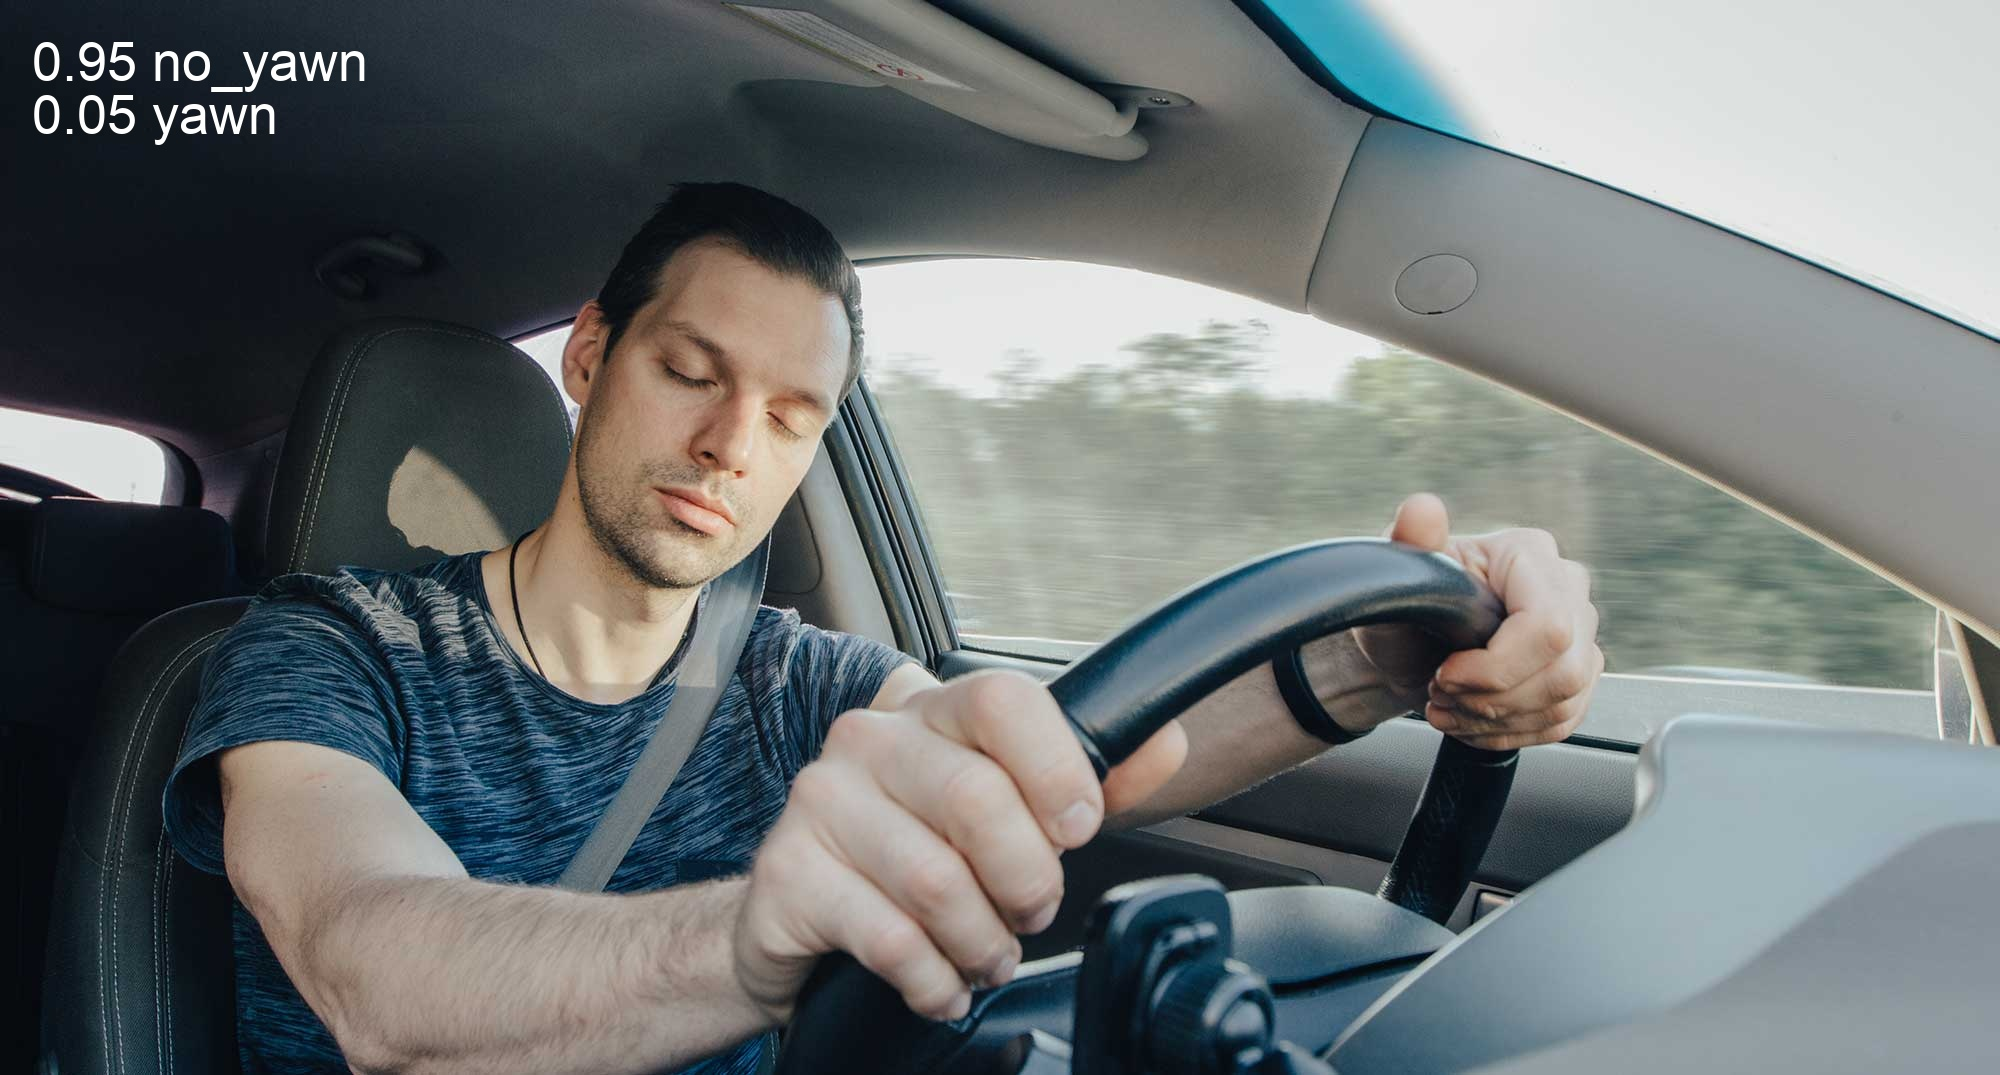



0.51 yawn
0.49 no_yawn


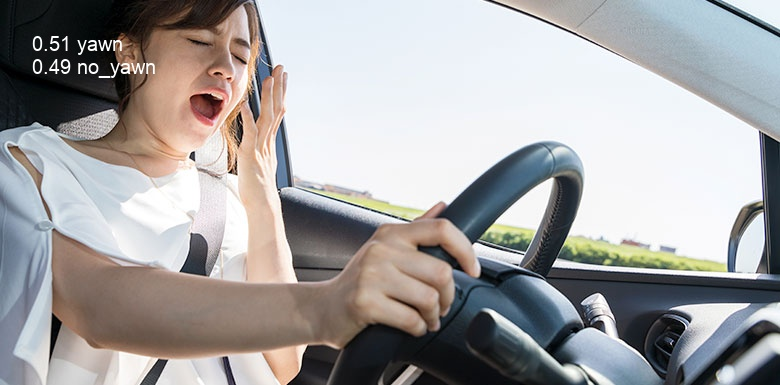

In [63]:
import glob
from IPython.display import Image, display

display(Image(filename="/content/yolov5/runs/detect/exp4/135.jpg"))
print("\n")
display(Image(filename="/content/yolov5/runs/detect/exp2/1032.jpg"))
print("\n")

with open("/content/yolov5/runs/predict-cls/exp2/output.txt", 'r') as file:
    content = file.read()
    print(content)
display(Image(filename="/content/yolov5/runs/predict-cls/exp2/eye1yawn0.jpg"))
print("\n")

with open("/content/yolov5/runs/predict-cls/exp3/output.txt", 'r') as file:
    content = file.read()
    print(content)
display(Image(filename="/content/yolov5/runs/predict-cls/exp3/eye1yawn11.jpg"))
print("\n")

In [ ]:
# put this after write results (line 144) in classify/predict.py :             
            # #save text file
            # print(text)
            # output_path = f"/content/yolov5/{save_dir}"
            # filename = f"output.txt"
            # full_path = os.path.join(output_path, filename)
            # with open(full_path, "w") as file:
            #   file.write(f"{text}")